Kunskapskontroll_SQL_TahiraRaza

Teoretiska frågor
1. Beskriv kort hur en relationsdatabas fungerar.
  En relationsdatabas fungerar genom att organisera data i tabeller. Dessa tabeller representerar en vis typ av information som t.ex. produkter, kunder       eller beställningar inom ett företag.
2.  Vad menas med “CRUD”-flödet?
   CRUD är en förkortning för de fyra grundläggande operationer som kan utföras i en databas. CRUD står för:
   Create: Skapa nya poster i databasen
   Read: Läsa eller hämta data från datanasen
   Update: Uppdatera befintliga poster
   Delete: Ta bort poster från databasen
3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
   En "left join" retunerar alla rader från den vänstra tabellen och matchande rader från den högra tabellen. Om det inte finns någon matchning i den         högra tabellen retuneras "NULL" för de högra tabellens kolumner. En "left join" används för att säkerställa att all data från den vänstra tabellen inkluderas även om det saknas matchande data i den högra tabellen.
   En "inner join" används för att kombinera rader från två tabeller baserat på ett villkor som uppfylls i båda tabellerna. Den retunerar bara de rader       som har en matchning i båda tabellerna.
4. Beskriv kort vad indexering i SQL innebär.
   Indexering används för att hitta rader som uppfyller ett visst kriterium i en specifik kolumn. Genom att använda ett index kan systemet direkt söka     bland de värden som är lagrade i indexet och därmed snabbt hitta de rader som matchar. Utan indexering måste systemet gå igenom tabellen rad för rad för att hitta matchande rader, vilket gör sökningen långsammare.
5. Beskriv kort vad en vy i SQL är.
   En vy i SQL är en virtuell tabell vars innehåll definieras av en query, vilket gör data lättillgänglig i tabellformat.
6. Beskriv kort vad en lagrad procedur i SQL är.
   En lagrad procedur i SQL är en fördefinierad och sparad uppsättning SQL-kommandon som kan köras flera gånger. Den lagras på servern och kan anropas vid behov, vilket gör det enklare att hantera repetitiva eller komplexa uppgifter i en databas.

Fråga 1. Ge en deskriptiv sammanfattning över databasen AdventureWorks2022.

In [19]:
! pip install sqlalchemy pyodbc pandas jupyter matplotlib

In [16]:
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine

SERVER = 'localhost'  # Eller din serveradress
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

# Skapa connection_url med URL.create
connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

# Skapa engine för att kommunicera med databasen
engine = create_engine(connection_url)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [25]:
# En SQL-query för att hämta namn på alla tabeller i databasen. 
#Att lista alla tabeller hjälper med att förstå den övergripande strukturen i databasen och identifiera vilka delar av databasen
#som innehåller den data man är intresserad av.

query = """
SELECT table_name 
FROM information_schema.tables 
WHERE table_type = 'BASE TABLE'
"""

# Läs in datan i en DataFrame
tables_df = pd.read_sql(query, engine)

# Visa resultatet
print(tables_df)

                 table_name
0              SalesTaxRate
1          PersonCreditCard
2               PersonPhone
3            SalesTerritory
4           PhoneNumberType
..                      ...
66                 Location
67                 Password
68  SalesPersonQuotaHistory
69                   Person
70              SalesReason

[71 rows x 1 columns]


In [4]:
import pandas as pd
import sqlalchemy

In [6]:
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine

SERVER = 'localhost'  # Eller din serveradress
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

# Skapa connection_url med URL.create
connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

# Skapa engine för att kommunicera med databasen
engine = create_engine(connection_url)

In [7]:
# SQL-query för att räkna antalet rader i varje tabell. Detta kommer ge en känsla för datamängden. 

query = """
SELECT t.name AS TableName, p.rows AS RowCounts
FROM sys.tables AS t
INNER JOIN sys.partitions AS p ON t.object_id = p.object_id
WHERE p.index_id < 2;
"""

# Läs in datan i en DataFrame
tables_df = pd.read_sql(query, engine)

# Visa resultatet
print(tables_df)

              TableName  RowCounts
0           DatabaseLog       1596
1              ErrorLog          0
2   ProductProductPhoto        504
3               Address      19614
4           AddressType          6
..                  ...        ...
66          UnitMeasure         38
67               Vendor        104
68            WorkOrder      72591
69     WorkOrderRouting      67131
70      BillOfMaterials       2679

[71 rows x 2 columns]


# Jag var mest intresserad av företagets produkter och försäljning så jag började med att ställa några allmänna frågor i SQL.

In [13]:
# Vad är det totala antalet produkter?

# Räkna unika produkt ID:n i tabellen Production.Product för att få det totala antalet produkter.
query = """
SELECT COUNT(DISTINCT ProductID) As [Total Number of Products]
FROM Production.Product;
"""

# läs in resultatet i en DataFrame
total_products_df = pd.read_sql(query, engine)

# Visa resultatet
print(total_products_df)

   Total Number of Products
0                       504


In [17]:
# Vilka är de 10 dyraste produkter i företagets sortiment?

query = """
SELECT TOP 10 
    p.Name AS ProductName,                       -- Produktnamn
    p.ListPrice AS Price                         -- Pris för produkten
FROM 
    Production.Product AS p                      -- Från tabellen Product
ORDER BY 
    p.ListPrice DESC;                            -- Sorterar i fallande ordning efter pris
"""

# Läs in datan i en DataFrame
top_10_expensive_products_df = pd.read_sql(query, engine)

# Visa resultatet för de 10 dyraste produkterna
print(top_10_expensive_products_df)

               ProductName    Price
0         Road-150 Red, 62  3578.27
1         Road-150 Red, 44  3578.27
2         Road-150 Red, 48  3578.27
3         Road-150 Red, 52  3578.27
4         Road-150 Red, 56  3578.27
5  Mountain-100 Silver, 38  3399.99
6  Mountain-100 Silver, 42  3399.99
7  Mountain-100 Silver, 44  3399.99
8  Mountain-100 Silver, 48  3399.99
9   Mountain-100 Black, 38  3374.99


In [15]:
# Hur många olika typer av produktkategorier finns det och hur många produkter finns i varje kategori? 

query = """
SELECT 
    pc.Name AS CategoryName,                                                                           -- Väljer kategoriens namn
    COUNT(p.ProductID) AS ProductCount                                                                 -- Räknar antalet produkter i varje kategori
FROM 
    Production.Product AS p                                                                            -- Från tabellen Product
INNER JOIN 
    Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID            -- Kopplar produkt till produktkategori
INNER JOIN 
    Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID                    -- Kopplar produktkategori till subkategori
GROUP BY 
    pc.Name                                                                                            -- Grupperar efter kategori
ORDER BY 
    ProductCount DESC;                                                                                -- Sorterar i fallande ordning efter antal produkter
"""

# Läs in datan i en DataFrame
category_count_df = pd.read_sql(query, engine)

# Visa resultatet för antalet produkter per kategori
print(category_count_df)


  CategoryName  ProductCount
0   Components           134
1        Bikes            97
2     Clothing            35
3  Accessories            29


In [16]:
# Vilka är de 10 mest sålda produkter?

query = """
SELECT TOP 10 
    p.Name AS ProductName,                                      -- Produktnamn
    SUM(sod.OrderQty) AS TotalSalesQuantity                     -- Total försäljningsvolym per produkt
FROM 
    Sales.SalesOrderDetail AS sod                               -- Från tabellen SalesOrderDetail
INNER JOIN 
    Production.Product AS p ON sod.ProductID = p.ProductID      -- Kopplar produkt med försäljningsdata
GROUP BY 
    p.Name                                                      -- Grupperar efter produktnamn
ORDER BY 
    TotalSalesQuantity DESC;                                    -- Sorterar i fallande ordning efter försäljningsvolym
"""

# Läs in datan i en DataFrame
top_10_products_df = pd.read_sql(query, engine)

# Visa resultatet för de 10 mest sålda produkterna
print(top_10_products_df)


                       ProductName  TotalSalesQuantity
0                     AWC Logo Cap                8311
1            Water Bottle - 30 oz.                6815
2           Sport-100 Helmet, Blue                6743
3       Long-Sleeve Logo Jersey, L                6592
4          Sport-100 Helmet, Black                6532
5            Sport-100 Helmet, Red                6266
6                  Classic Vest, S                4247
7              Patch Kit/8 Patches                3865
8  Short-Sleeve Classic Jersey, XL                3864
9       Long-Sleeve Logo Jersey, M                3636


# Specifika frågor: jämförelse och visualisering av data

In [24]:
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt 

SERVER = 'localhost'  # Eller din serveradress
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

# Skapa connection_url med URL.create
connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

# Skapa engine för att kommunicera med databasen
engine = create_engine(connection_url)

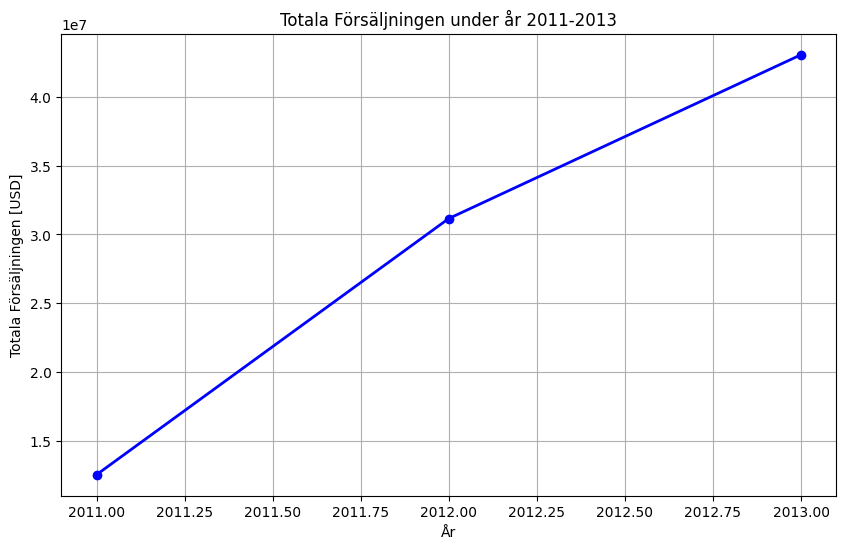

In [58]:
# Hur gick den totala försäljningen under de tre senaste åren (2011 - 2013)?

query = """
SELECT 
    YEAR(SO.ShipDate) AS Year,                                               -- Hämtar året från ShipDate
    SUM(SOD.LineTotal) AS TotalSales                                         -- Summerar försäljningen per år
FROM 
    Sales.SalesOrderHeader AS SO                                            -- Hämtar data från SalesOrderHeader
INNER JOIN 
    Sales.SalesOrderDetail AS SOD ON SO.SalesOrderID = SOD.SalesOrderID     -- Kopplar ihop orderhärledning och orderdetaljer
WHERE 
    YEAR(SO.ShipDate) BETWEEN 2011 AND 2013                                 -- Filtrerar på åren 2011 till 2013
GROUP BY 
    YEAR(SO.ShipDate)                                                        -- Grupperar efter år
ORDER BY 
    YEAR(SO.ShipDate);                                                       -- Sorterar efter år
"""

# Läs in data i en DataFrame
sales_data = pd.read_sql(query, engine)

# Plotta resultatet
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Year'], sales_data['TotalSales'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Totala Försäljningen under år 2011-2013')
plt.xlabel('År')
plt.ylabel('Totala Försäljningen [USD]')
plt.grid(True)
plt.show()

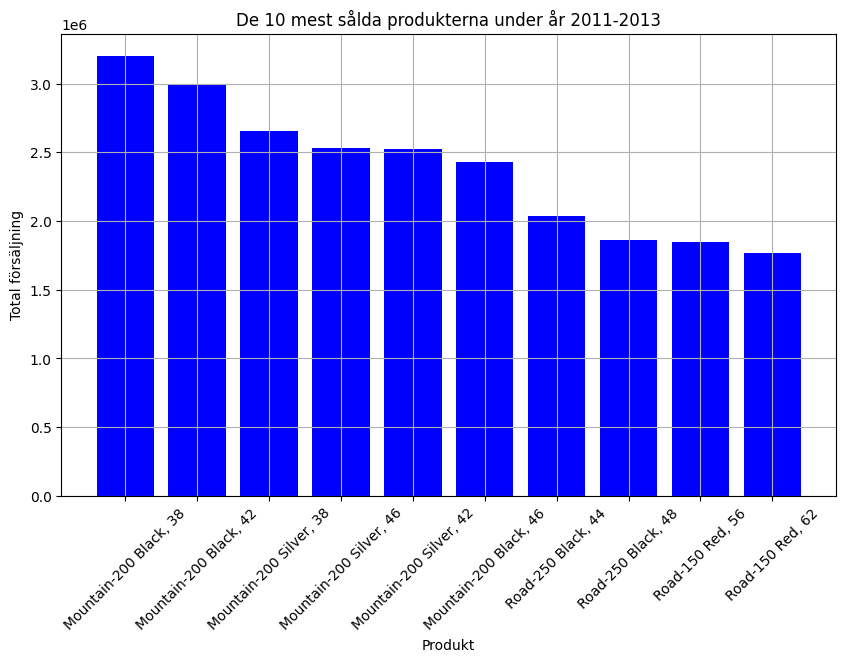

In [57]:
# Vilka 10 produkter såldes mest under åren 2011-2013?

query = """
  SELECT TOP 10
    p.Name AS ProductName,                                               -- Produktens namn
    SUM(SOD.LineTotal) AS TotalSales                                      -- Summerar försäljningen per produkt
FROM 
    Sales.SalesOrderHeader AS SO                                           -- Hämtar data från SalesOrderHeader
INNER JOIN 
    Sales.SalesOrderDetail AS SOD ON SO.SalesOrderID = SOD.SalesOrderID    -- Kopplar ihop orderhärledning och orderdetaljer
INNER JOIN 
    Production.Product AS p ON SOD.ProductID = p.ProductID                -- Kopplar ihop orderdetaljer med produktnamn
WHERE 
    YEAR(SO.ShipDate) BETWEEN 2011 AND 2013                               -- Filtrerar på åren 2011 till 2013
GROUP BY 
    p.Name                                                                 -- Grupperar efter produktens namn
ORDER BY 
    TotalSales DESC                                                        -- Sorterar i fallande ordning efter försäljning                                                            
"""

# Läs in data i en DataFrame
sales_data = pd.read_sql(query, engine)

# Plotta resultatet
plt.figure(figsize=(10, 6))
plt.bar(sales_data['ProductName'], sales_data['TotalSales'], color='b')
plt.title('De 10 mest sålda produkterna under år 2011-2013')
plt.xlabel('Produkt')
plt.ylabel('Total försäljning')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

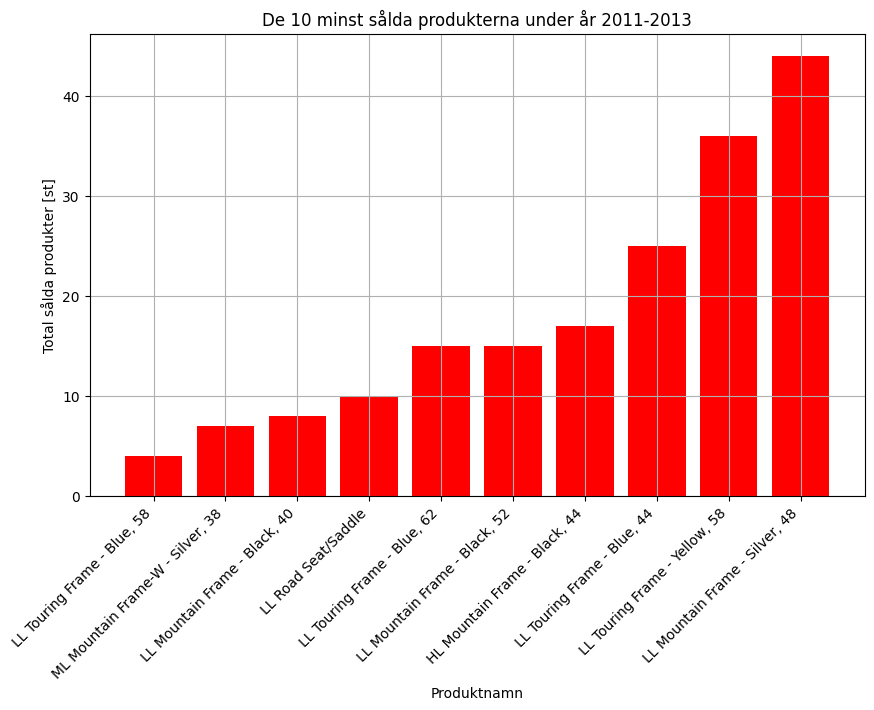

In [56]:
# Vilka 10 produkter såldes minst under åren 2011-2013?

query = """
SELECT TOP 10
    p.Name AS ProductName,                                              -- Hämtar produktnamnet
    SUM(SOD.OrderQty) AS TotalQuantitySold                              -- Summerar den totala mängden sålda enheter
FROM 
    Sales.SalesOrderDetail AS SOD                                        -- Hämtar orderdetaljer
INNER JOIN 
    Production.Product AS p ON SOD.ProductID = p.ProductID               -- Kopplar ihop produktinformation med orderdetaljer
INNER JOIN 
    Sales.SalesOrderHeader AS SO ON SO.SalesOrderID = SOD.SalesOrderID   -- Kopplar ihop orderhuvuden med orderdetaljer
WHERE 
    YEAR(SO.ShipDate) BETWEEN 2011 AND 2013                               -- Filtrerar på åren 2011 till 2013
GROUP BY 
    p.Name                                                                -- Grupperar resultatet efter produktnamn
ORDER BY 
    TotalQuantitySold ASC;                                                -- Sorterar efter den totala mängden sålda enheter i stigande ordning
"""

# Läs in data i en DataFrame
sales_data = pd.read_sql(query, engine)

# Plotta resultat
plt.figure(figsize=(10, 6))
plt.bar(sales_data['ProductName'], sales_data['TotalQuantitySold'], color='r')
plt.title('De 10 minst sålda produkterna under år 2011-2013')
plt.xlabel('Produktnamn')
plt.ylabel('Total sålda produkter [st]')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Uppgift 2. Gör en statistisk analys av valfri del av datan. Den skall innehålla åtminstone ett konfidensintervall. Hur tolkar du resultaten?

# I denna uppgift kommer jag att analysera försäljningen av olika produktkategorier under månaderna september-december 2011-2013. Syftet är att identifiera vilka produkter som såldes mest eller minst under dessa perioder. Eftersom vi saknar data för samma månader under 2014, kommer denna analys ge en indikation på vilka produkter som förväntas ha hög eller låg efterfrågan under samma månader 2014. Den centrala frågan i uppgiften är:

# Hur kan försäljningen av produktkategorier under september-december 2011-2013 användas för att förutsäga lagerbehovet för dessa månader under 2014?

In [38]:
# SQL query för försäljning per produktkategori för månaderna september-december år 2011-2013

query = """
SELECT 
    YEAR(SOH.OrderDate) AS Year,                                                                       -- Extraherar året från OrderDate
    MONTH(SOH.OrderDate) AS Month,                                                                     -- Extraherar månaden från OrderDate
    PC.Name AS ProductCategory,                                                                        -- Namnet på produktkategorin
    SUM(SOD.LineTotal) AS TotalSales                                                                   -- Totalsumma av försäljning (LineTotal)
FROM Sales.SalesOrderHeader AS SOH                                                                     -- Försäljningshuvudtabellen
JOIN Sales.SalesOrderDetail AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID                             -- Kopplar försäljningsdetaljer till huvudtabellen
JOIN Production.Product AS P ON SOD.ProductID = P.ProductID                                             -- Kopplar produkter till försäljningsdetaljer
JOIN Production.ProductSubcategory AS PSC ON P.ProductSubcategoryID = PSC.ProductSubcategoryID          -- Kopplar produkter till underkategorier
JOIN Production.ProductCategory AS PC ON PSC.ProductCategoryID = PC.ProductCategoryID                   -- Kopplar underkategorier till kategorier
WHERE MONTH(SOH.OrderDate) IN (9, 10, 11, 12)                                                          -- Filtrerar för månaderna september till december
AND YEAR(SOH.OrderDate) BETWEEN 2011 AND 2013                                                           -- Filtrerar för åren 2011-2013
GROUP BY YEAR(SOH.OrderDate), MONTH(SOH.OrderDate), PC.Name                                          -- Grupperar data efter år, månad och produktkategori
ORDER BY Year, Month, ProductCategory;                                                                  -- Sorterar data efter år, månad och kategori
"""

# Läs in data i en DataFrame
sales_data = pd.read_sql(query, engine)

# Visa resultatet
print(sales_data.head())

   Year  Month ProductCategory    TotalSales
0  2011      9           Bikes  5.020738e+05
1  2011     10     Accessories  9.758571e+03
2  2011     10           Bikes  4.258154e+06
3  2011     10        Clothing  1.574053e+04
4  2011     10      Components  3.051089e+05


In [39]:
# Summera försäljning per produktkategori över september - december 2011 - 2013

category_sales = sales_data.groupby('ProductCategory')['TotalSales'].sum().reset_index()
print(category_sales)


  ProductCategory    TotalSales
0     Accessories  3.882182e+05
1           Bikes  3.058119e+07
2        Clothing  6.103389e+05
3      Components  2.975482e+06


In [68]:
# SQL query för att hämta produkter och deras kategorier

query = """
WITH ProductRanked AS (
    SELECT 
        P.Name AS ProductName,                                                                          -- Hämtar produktnamn
        PC.Name AS ProductCategory,                                                                     -- Hämtar produktkategori
        ROW_NUMBER() OVER (PARTITION BY PC.Name ORDER BY P.Name) AS RowNum      -- Tilldelar ett radnummer till varje produkt inom samma kategori, sorterat alfabetiskt
    FROM 
        Production.Product AS P                                                                           -- Hämtar data från produkttabellen
    JOIN 
        Production.ProductSubcategory AS PSC ON P.ProductSubcategoryID = PSC.ProductSubcategoryID         -- Kopplar produkter till underkategorier
    JOIN 
        Production.ProductCategory AS PC ON PSC.ProductCategoryID = PC.ProductCategoryID                  -- Kopplar underkategorier till huvudkategorier
)
-- Hämta data från den temporära tabellen
SELECT 
    ProductName, 
    ProductCategory
FROM 
    ProductRanked
WHERE 
    RowNum <= 5                                                                   -- Filtrerar ut endast de fem första produkterna inom varje kategori
ORDER BY 
    ProductCategory, RowNum;                                                      -- Sorterar resultatet efter kategori och radnummer
"""

# Läs in data i en DataFrame
df = pd.read_sql(query, engine)

# Dela upp DataFrame i två kolumner: en för produktnamn och en för produktkategori
df_products = df[['ProductName']]
df_categories = df[['ProductCategory']]

# Visa de två DataFrames bredvid varandra
result = pd.concat([df_products, df_categories], axis=1)
print(result)

                ProductName ProductCategory
0    All-Purpose Bike Stand     Accessories
1     Bike Wash - Dissolver     Accessories
2                Cable Lock     Accessories
3     Fender Set - Mountain     Accessories
4    Headlights - Dual-Beam     Accessories
5    Mountain-100 Black, 38           Bikes
6    Mountain-100 Black, 42           Bikes
7    Mountain-100 Black, 44           Bikes
8    Mountain-100 Black, 48           Bikes
9   Mountain-100 Silver, 38           Bikes
10             AWC Logo Cap        Clothing
11          Classic Vest, L        Clothing
12          Classic Vest, M        Clothing
13          Classic Vest, S        Clothing
14    Full-Finger Gloves, L        Clothing
15                    Chain      Components
16             Front Brakes      Components
17         Front Derailleur      Components
18        HL Bottom Bracket      Components
19              HL Crankset      Components


# Visualisering av försäljningstrender

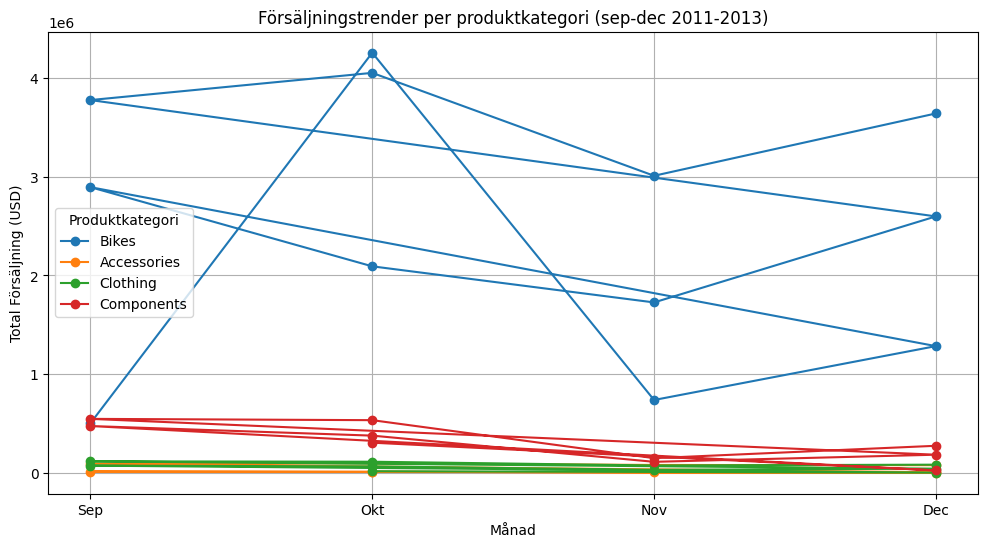

In [55]:
# Gruppera data per produktkategori och månad för att analysera trender över unika produktkategorier
categories = sales_data['ProductCategory'].unique() 

# Skapa en linjediagram för varje kategori
plt.figure(figsize=(12, 6)) 

for category in categories:
   
    # Filtrera data för kategorin
    category_data = sales_data[sales_data['ProductCategory'] == category]
   
    # Plotta försäljningstrenden
    plt.plot(
        category_data['Month'], 
        category_data['TotalSales'], 
        marker='o', 
        label=category 
    )

# Plotta resultat
plt.title("Försäljningstrender per produktkategori (sep-dec 2011-2013)")
plt.xlabel("Månad")
plt.ylabel("Total Försäljning (USD)")
plt.xticks([9, 10, 11, 12], labels=["Sep", "Okt", "Nov", "Dec"]) 
plt.legend(title="Produktkategori") 
plt.grid(True) 
plt.show()

# Ovanstående linjediagram visar försäljningstrender för varje produktkategori under sep-dec 2011-2013. Diagrammet visar att försäljning för Bikes har varit hög under dessa månader över de senaste tre åren. 

In [42]:
pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/44.5 MB 12.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/44.5 MB 10.7 MB/s eta 0:00:04
   ---- ----------------------------------- 5.5/44.5 MB 8.6 MB/s eta 0:00:05
   ------ --------------------------------- 6.8/44.5 MB 8.4 MB/s eta 0:00:05
   -------- ------------------------------- 9.7/44.5 MB 8.9 MB/s eta 0:00:04
   ---------- ----------------------------- 11.8/44.5 MB 9.2 MB/s eta 0:00:04
   ------------ --------------------------- 13.6/44.5 MB 9.1 MB/s eta 0:00:04
   --------------- ------------------------ 16.8/44.5 MB 9.7 MB/s eta 0:00:03
   ---------------- ----------------------- 18.4/44.5 MB 9.7 MB/s eta 0:00:03
   ------------------ --------------------- 20.7/44.5 MB 9.7 MB/s eta 0:00:03
   --------------------- ------------------ 23.6/44.5 MB 10.1 MB/s eta 0:00:03
   ---------------------- ----------------- 25.2/44.5 MB 10.1 MB/s eta 0:0

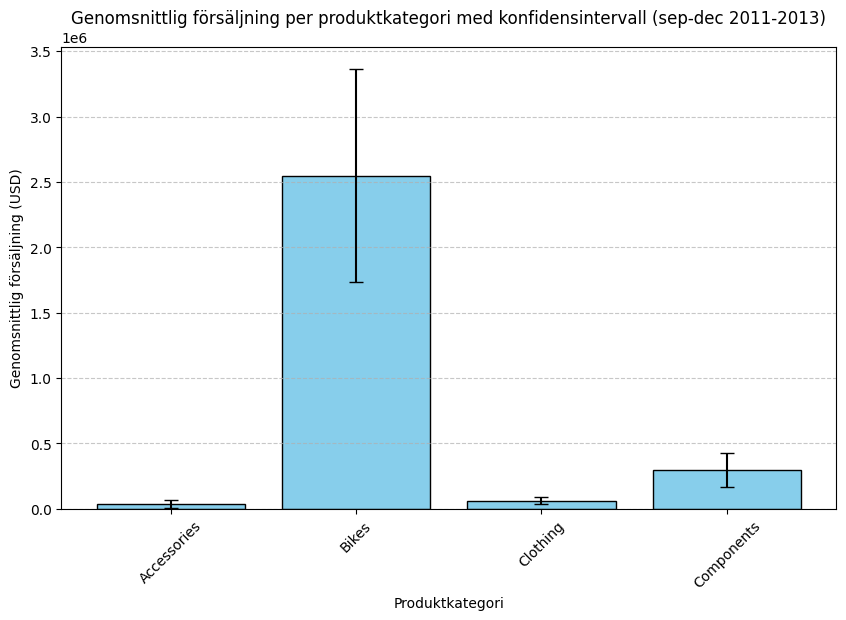

In [53]:
# Beräkning av konfidensintervall

import numpy as np
from scipy.stats import t

# Filtrera för månaderna september-december (månad 9-12)
sales_data_filtered = sales_data[sales_data['Month'].isin([9, 10, 11, 12])]

# Gruppera per produktkategori och beräkna medelvärde och konfidensintervall
summary_data = sales_data_filtered.groupby('ProductCategory')['TotalSales'].apply(
    lambda x: calculate_confidence_interval(x)
).reset_index()

# Separera medelvärden och halvbredd (h)
summary_data[['Mean', 'HalfWidth']] = pd.DataFrame(summary_data['TotalSales'].tolist(), index=summary_data.index)
summary_data.drop(columns=['TotalSales'], inplace=True)

# Skapa stapeldiagram
plt.figure(figsize=(10, 6))
plt.bar(
    summary_data['ProductCategory'], 
    summary_data['Mean'], 
    yerr=summary_data['HalfWidth'],  
    color='skyblue', 
    edgecolor='black', 
    capsize=5  
) 

# Plotta resultat
plt.title("Genomsnittlig försäljning per produktkategori med konfidensintervall (sep-dec 2011-2013)")
plt.xlabel("Produktkategori")
plt.ylabel("Genomsnittlig försäljning (USD)")
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ovanstående stapeldiagram med konfidensintervall visar den genomsnittliga försäljningen per produktkategori under september-december 2011-2013. 

# Uppgift 3. Analysera datan och resultaten du tagit fram. Vilka slutsatser och rekommendationer kan du ge?

# Linjediagrammet
illustrerar hur försäljningen av olika produktkategorier har utvecklats under månaderna september-december 2011–2013. Genom denna analys kan vi identifiera tydliga mönster och säsongsvariationer för varje kategori.

Försäljningen av Bikes har varit hög de senaste tre åren, med den största försäljningsvolymen i oktober. Under vintermånaderna har försäljningen minskat avsevärt. En liknande trend syns för Components som kedjor, bromsar och växlar, där försäljningen också toppar i oktober och därefter sjunker något under de följande månaderna men inte lika kraftigt.

Försäljningen av Clothing och Accessories är stabil över hela perioden utan större variation mellan månaderna. Detta innebär att lagerbehovet för dessa kategorier kan förbli konstant medan efterfrågan på Bikes ökar under hösten och kräver ett högre lager under denna period.

# Stapeldiagrammet
visar den genomsnittliga försäljningen per produktkategori tillsammans med ett konfidensintervall som visar osäkerheten kring medelvärdet. Kategorier med ett smalare konfidensintervall, såsom Accessories och Clothing, tyder på att medelvärdet är nära det verkliga värdet, vilket innebär att försäljningen är mer förutsägbar. För dessa kategorier går det att göra en mer exakt lagerprognos för året 2014.

Försäljningen av Bikes uppvisar det största konfidensintervallet bland alla produktkategorier, vilket indikerar en högre variation i försäljningen. Detta tyder på att efterfrågan på Bikes är mer osäker och kan påverkas av externa faktorer som säsongsvariationer eller marknadsdynamik. Components, såsom kedjor och bromsar, har det näst största konfidensintervallet, vilket också visar på viss variation i försäljningen men inte i samma utsträckning som för Bikes. Det verkar som att försäljningen av Components är mer stabil även om variationen fortfarande är påtaglig över de tre åren.

# Rekommendationer
Försäljningen av Bikes är mycket osäker vilket innebär att det är viktigt att ha en flexibel lagerstrategi särskilt inför hösten. Företaget kan överväga att hålla ett större lager under de månader då efterfrågan historiskt har varit högre (som oktober) men bör också vara berett att justera lagerbehovet om försäljningen inte följer det förväntade mönstret.

Eftersom Components säljs mest under höst och vinter kan det vara fördelaktigt att upprätthålla ett tillräckligt lager för dessa månader. En stabil lagerhållning bör vara tillräcklig för att möta efterfrågan.

Eftersom efterfrågan på Clothing och Accessories verkar vara mer stabil över året, kan företaget planera för en jämnare lagerhållning och göra mer förutsägbara lagerprognoser. Det kan vara fördelaktigt att hålla ett konstant lager genom hela året.

# Executive summary
Denna analys har undersökt försäljningstrender för produktkategorierna Bikes, Components, Clothing och Accessories under månaderna september–december 2011–2013 för att ge underlag för lagerplaneringen 2014. Bikes uppvisar den största variationen i efterfrågan, särskilt under hösten, medan Components har en något mindre variation men är ändå relativt stabila. Clothing och Accessories visar en jämn efterfrågan över alla månader.

För 2014 rekommenderas att hålla ett större lager av Bikes under hösten, upprätthålla flexibilitet i lagernivåerna för Components och bibehålla en stabil lagerhållning för Clothing och Accessories. Genom att implementera dessa strategier kan företaget effektivisera sin lagerhantering och bättre möta kundernas efterfrågan.

# Muntligt presentation
Jag kommer att presentera mitt arbete imorgon fredag den 3e januari.

# Självvärdering
En av de största utmaningarna jag stötte på under arbetet var att hitta relevant data i databasen. Det tog längre tid än jag förväntat mig att identifiera och extrahera de data jag behövde för att kunna genomföra analysen på ett meningsfullt sätt. För att hantera detta tog jag hjälp av diskussioner med vänner på Discord och utforskade databasen mer noggrant.
Jag anser att jag förtjänar betyget G för arbetet då jag inte har genomfört någon avancerad analys men har ändå lyckats ge en grundläggande och tydlig analys av försäljningsdata. Jag har också försökt att hålla en röd tråd genom hela arbetet. 
Om jag skulle ge mig själv ett tips i början av kursen skulle det vara att noggrant förstå datakällor och strukturer innan man påbörjar analysen. Att spendera mer tid på att utforska och förbereda datan skulle ha sparat mig tid och minskat stressen under arbetets gång.